In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1)

### Expectation of X

In [2]:
def e_x(probability_table, variable_values):
    lx = probability_table.shape[0]
    ex = 0
    for i in range(lx):
        ex = ex + sum(p_table.iloc[i])*variable_values[0][i]
    return ex

### Expectation of Y

In [3]:
def e_y(probability_table, variable_values):
    ly = probability_table.shape[1]
    ey = 0
    for i in range(ly):
        ey = ey + sum(p_table.T.iloc[i])*variable_values[1][i]
    return ey

### Conditinal Expectation of X 

In [4]:
def x_given_y(probability_table, variable_values):
    lx = probability_table.shape[0]
    ly = probability_table.shape[1]
    xgy_list = list()
    for j in range(ly):
        xgy = 0
        for i in range(lx):
            xgy = xgy + (p_table.T.iloc[j,i] / sum(p_table.T.iloc[j])) * variable_values[0][i]
        xgy_list.append(xgy)
    return xgy_list

### Conditinal Expectation of Y 

In [5]:
def y_given_x(probability_table, variable_values):
    lx = probability_table.shape[0]
    ly = probability_table.shape[1]
    ygx_list = list()
    for j in range(lx):
        ygx = 0
        for i in range(ly):
            ygx = ygx + (p_table.iloc[j,i] / sum(p_table.iloc[j])) * variable_values[1][i]
        ygx_list.append(ygx)
    return ygx_list

### Covariance of X and Y

In [6]:
def cov_x_and_y(probability_table, variable_values):
    lx = probability_table.shape[0]
    ly = probability_table.shape[1]
    covxy = 0
    for i in range(lx):
        for j in range(ly):
            covxy = covxy + (variable_values[0][i] - e_x(p_table,variable_values))*(variable_values[1][j] - e_y(p_table,variable_values))*(probability_table.iloc[i,j])
    return covxy

## 2 ) Joint Entropy

In [7]:
def entropy_joint(probability_table):
    lx = probability_table.shape[0]
    ly = probability_table.shape[1]
    hxy = 0
    for i in range(lx):
        for j in range(ly):
            if(probability_table.iloc[i,j]!=0):
                hxy = hxy - np.log(probability_table.iloc[i,j])*probability_table.iloc[i,j]
    return hxy

## 3)

### Marginal Entropy of X

In [8]:
def entropy_x(probability_table, variable_values):
    lx = probability_table.shape[0]
    margex = 0
    for i in range(lx):
        if(sum(probability_table.iloc[i])!=0):
            margex = margex - sum(probability_table.iloc[i])*np.log(sum(probability_table.iloc[i]))
    return margex

### Marginal Entropy of Y

In [9]:
def entropy_y(probability_table, variable_values):
    ly = probability_table.shape[1]
    margey = 0
    for i in range(ly):
        if(sum(probability_table.iloc[:,i])!=0):
            margey = margey - sum(probability_table.iloc[:,i])*np.log(sum(probability_table.iloc[:,i]))
    return margey

## 4)

### Conditional Entropy: X|Y

In [10]:
def entropy_x_given_y(probability_table):
    lx = probability_table.shape[0]
    ly = probability_table.shape[1]
    probability_table2 = probability_table.copy()
    for i in range(ly):
        probability_table2.iloc[:,i] = probability_table.iloc[:,i] / probability_table.iloc[:,i].sum()
    ehxy = 0
    for i in range(lx):
        for j in range(ly):
            if(probability_table2.iloc[i,j]!=0):
                ehxy = ehxy - np.log(probability_table2.iloc[i,j])*probability_table.iloc[i,j]
    return ehxy

### Conditional Entropy: Y|X

In [11]:
def entropy_y_given_x(probability_table):
    lx = probability_table.shape[0]
    ly = probability_table.shape[1]
    probability_table2 = probability_table.copy()
    for i in range(lx):
        probability_table2.iloc[i,:] = probability_table.iloc[i,:] / probability_table.iloc[i,:].sum()
    ehyx = 0
    for i in range(lx):
        for j in range(ly):
            if(probability_table2.iloc[i,j]!=0):
                ehyx = ehyx - np.log(probability_table2.iloc[i,j])*probability_table.iloc[i,j]
    return ehyx

## 5) Mutual Information

In [12]:
def mutual_information(probability_table,variable_values):
    return entropy_x(probability_table, variable_values) - entropy_x_given_y(probability_table)

## 6) Testing Program

In [13]:
### Probability Table and variable values for 2d, first one is x, second of is y
p_table = pd.DataFrame(list([[0.3,0.3,0], [0.1,0.2,0.1]]))
variable_values = list([[1,2],[-1,0,5]])

In [14]:
p_table

,0,1,2
0,0.3,0.3,0.0
1,0.1,0.2,0.1


In [15]:
variable_values

[[1, 2], [-1, 0, 5]]

In [16]:
print("<x> : "  + str(e_x(p_table, variable_values)))
print("<y> : "  + str(e_y(p_table, variable_values)))
print("<x|y> : "  + str(x_given_y(p_table, variable_values)))
print("<y|x> : "  + str(y_given_x(p_table, variable_values)))
print("Cov[x,y] : "  + str(cov_x_and_y(p_table, variable_values)))
print("H[x,y] : "  + str(entropy_joint(p_table)))
print("H[x] : "  + str(entropy_x(p_table,variable_values)))
print("H[y] : "  + str(entropy_y(p_table,variable_values)))
print("H[x|y] : "  + str(entropy_x_given_y(p_table)))
print("H[y|x] : "  + str(entropy_y_given_x(p_table)))
print("I(x,y) : "  + str(mutual_information(p_table, variable_values)))

<x> : 1.4
<y> : 0.09999999999999998
<x|y> : [1.25, 1.4, 2.0]
<y|x> : [-0.5, 1.0]
Cov[x,y] : 0.36000000000000004
H[x,y] : 1.5047882836811908
H[x] : 0.6730116670092565
H[y] : 0.9433483923290391
H[x|y] : 0.5614398913521517
H[y|x] : 0.8317766166719344
I(x,y) : 0.11157177565710485


## 7) Entropy Graph

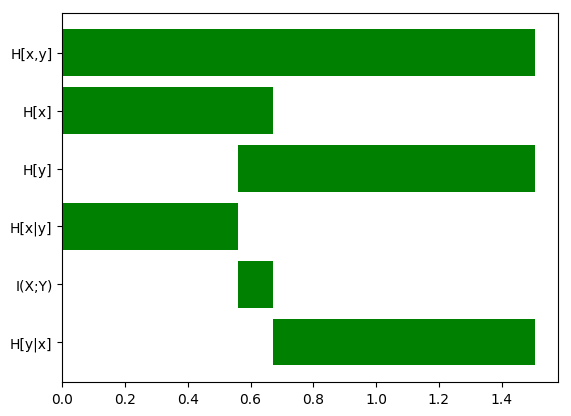

In [17]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(np.array([3,2,1,1,0,-1,-1,-2,-2]), np.array([entropy_joint(p_table),
        entropy_x(p_table,variable_values),
        entropy_joint(p_table),entropy_joint(p_table) - entropy_y(p_table,variable_values),
        entropy_x_given_y(p_table),
        entropy_x_given_y(p_table) + mutual_information(p_table, variable_values),
        entropy_x_given_y(p_table),
        entropy_x_given_y(p_table) + entropy_y_given_x(p_table) + mutual_information(p_table, variable_values),
        entropy_x_given_y(p_table) + mutual_information(p_table, variable_values)]), 
        align='center', color=["green","green","green","white","green","green","white","green","white"]) 

ax.set_yticklabels(("","H[y|x]","I(X;Y)","H[x|y]","H[y]","H[x]","H[x,y]"))
plt.show()